# GRADIENT DESCENT

In [31]:
import numpy as np
from scipy.misc import derivative
from matplotlib import pyplot as plt  

# The objective of Gradient Descent is

\begin{equation}
    \underset{x}{minimize} \quad f(x)
\end{equation}

Determine the value of $x$ at which the value of $f(x)$ is minimum.


## Our Goal is to calculate the minimum value of the function.

Consider a Fucntion

\begin{equation}
    y = x^2 - 2x + 2
\end{equation}


### 1. Calculus Way
     
    Using calculus the minimum point can be determined as the point where derivative of the function is zero
     
\begin{equation}
\begin{aligned}
    \frac{dy}{dx} & = 0 \\ \\
    2 \cdot x - 2 & = 0 \\ \\
    x & = 1 
\end{aligned}
\end{equation}

    The above equation states the minimum value of function y occurs at x = 1. Therefore get the minimum value of y by plugging x = 1 

\begin{equation}
\begin{aligned}
   y & = x^2 - 2x + 2  \\ \\
     & = 1 - 2 + 2 \\ \\
     & = 1
\end{aligned}
\end{equation}

Therefore the coordinate for the minimum value for the function f is (x=1 , y=1). Instead of calculus we will use steepest descent to determine the value of x at which y = 0.


 ### 2. Gradient Descent Way

Choose a initial point of x to start descending from, x = 3

    Take Derivative of the Function

\begin{equation}
\begin{aligned}
    \frac{dy}{dx} & = \frac{d(x^2 + 2x + 1)}{dx} \\ \\
     f^{\prime}(y) & = 2x - 2
\end{aligned}
\end{equation}

    Calculate the Derivative

\begin{equation}
\begin{aligned}
     f^{\prime} & = 2 \cdot 3 - 2  \\ \\
                & = 4
\end{aligned}
\end{equation}

We know that the minimum of the function is not y = 4. So our initial approximation is wrong.

The positive gradient or derivative shows the we need to move backward in x-axis (towards neagtive values) to reach the minimum value the function. On the other hand we need to move forward in x-axis (towards positive values), in case our derivative is minimum.   

### Therefore, by studying the derivative of current guess, we can determine the direction whether we are getting closer or further from the minimum. 


## The equation is

\begin{equation}
\label{eq:sample}
\begin{aligned}
     x_{i+1} & = x_{i} - \alpha \cdot f^{\prime}(x_{i})  \\ 
\end{aligned}
\end{equation}

where,
> $x_{i+1}$ is the next guess that is closer to the minimum <br>
> $x_{i}$ is the initial guess <br>
> $\alpha$ is the step length <br>
> $f^{\prime}(x_{i})$ is the derivative of the function f at point $x_{i}$
      
The negative sign alows us to move towards downwards or to the minimum value. i.e. opposite direction of the derivate. If we were to find maximum value in a concave function, this sign would have been positive because we have to move in the same direction of the derivative.
       
       - If minimum -> Convex Function --> Move in opposite direction of gradient --> Negative Sign --> GRADIENT DESCENT 
       - If maximum -> Concave Function --> Move in same direction of gradient --> Positive Sign --> GRADIENT ASCENT
      
             
### Alpha (Step Size) 

Provides the size of the jump.

1. Large Alpha:
    Gets to the solution faster but beacuse of big jump, it might skip the actual minimum point and just keep on jumping back and forth (overshoot) without actually converging. 

> Start from $\alpha = 1$ and keep on reducing until the alpha is small enough for values to converge
   

### ALGORITHM:

### The algorithm determines $x$ value and optimal step function $\alpha$

The above equation must be solved iteratively to reach the minimum value of $f(x)$ by updating $x_{i+1}$ at each iteration until the $x_{i+1} = x_{i}$.  Intuitively this is the minimum point because the derivative at this point is 0 or the rate of change of $f(x)$ with respect to $x$ at this point is 0 or $f^{\prime}(x_{i})= 0$.

1. Take the initial guess $x_{0}$, choose the inital step length $\alpha_{0}$ and set max_iter as maximum iteration allowed
2. Determine the derivative $f^{\prime}(x_{0})$.
3. Solve for $x_{i+1} = x_{i} - \alpha \cdot f^{\prime}(x_{i})$
>The above equation subtracts or adds the current $x$ value to the derivative to determine new $x_{i+1}$. Further, higher the gardient (derivative), larger the step it moves in $x$ axis. Step function is used to control this step.
4. Check if  $|x_{i} - x_{i+1}| < \epsilon$ where epsilon is the difference between the two values that is acceptable for convergence.
    > 4.1. If converged, $x_{i}$ is the value of $x$ at which $y$ is minimum. <br>
    > 4.2. Else Check if iteration has reached max_iter <br>
            >> 4.2.1 If yes, Update $x_{i}$ as $x_{i} = x_{i+1}$ and increment iteration counter <br>
            >> 4.2.2 Else, decrease $\alpha$, reset increment counter ($i=0$), set $x_{i} = x_{0}$ and repeat from Step 2. 

The algorithm converges when $x$ gives the minimum value of $f(x)$ and $\alpha$ is small enough.

In [32]:
# Create x axis values
x = np.linspace(-12,12,100)

# String to store Function expression
function_str = ''

# Get y value    
get_y = lambda x : eval(function_str)    

In [33]:
# Define the function expression
function_str = 'x**2 + 3*x - 21'

# Generate y values
y = get_y(x)

In [34]:
# Calculate Derivative
dydx = lambda x : derivative(get_y,x)

In [35]:
# STEP 1: Initialize
x_initial = 10
step_function_initial = 1
epsilon = 1e-10
max_iter = 50
min_x = 0
min_y = 0

# Function to calculate Gradient Descent
def Gradient_Descent():
    iter = 0
    x_current = x_initial
    step_function = step_function_initial
    while(True):
        # STEP 2 and 3: Calculate Derivative and solve the equation
        x_new = x_current - (step_function*dydx(x_current))
#         print('Current:',x_current)
#         print('New:',x_new)
#         print('Difference:',abs(x_current - x_new))
        # STEP 4: Check the Condition
        if(abs(x_current - x_new) < epsilon):
            # STEP 4.1: Return minimum value
            return (x_current, step_function)
        else:
             # STEP 4.2: Check if iteration has reached max_iter 
            if iter <= max_iter:
                # STEP 4.2.1: Update x_current
                x_current = x_new
                iter = iter + 1
            else:
                # STEP 4.2.2 Reset iter and decrease step_function
                step_function = step_function - 0.01
                x_current = x_initial
                iter = 0
   

Minimum x = -1.5000000000557716
Minimum y = -23.25
Optimal Step Function=  0.7999999999999998


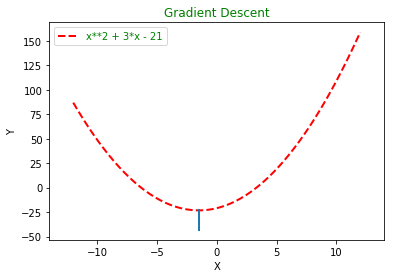

In [36]:
# Calculate Gradient Descent

min_x, step_function = Gradient_Descent()
min_y = get_y(min_x)
print('Minimum x =', min_x)
print('Minimum y =', min_y)
print('Optimal Step Function= ',step_function)
            
# Plot
%matplotlib inline
fig, ax = plt.subplots()
plt.rcParams.update({'figure.autolayout': False, 'lines.linewidth':2, 'lines.linestyle':'--', 'text.color': 'g'})
ax.set(xlim=[-14,14], xlabel='X', ylabel='Y', title='Gradient Descent')
# Plot the function with marker at minimum point
ax.plot(x,y, color='r', label=function_str, visible=True)
# Plot vertical line plot((x1,x2),(y1,y2))
ax.plot((min_x, min_x),(min_y, min_y-20), linestyle = '-')
ax.legend()     

# Usefulness of Gradient Descent

The derivatives of real world equations might be very tediuos to solve for $x$.
    - The gradient descent becomes handy in these situation. Instead of solving x, we use gradient descent to ESTIMATE x.